In general the Blob Detection scaling invarient. But scaling an image can affect blob detection in a few ways:

Change in blob size: Scaling the image uniformly (i.e., same scale factor for width and height) will simply change the size of the detected blobs proportionally. A larger image scale will result in larger detected blobs and vice versa.

Upscaling:
Blobs appear larger.
Might affect detection accuracy due to filter response changes.
Small blobs might become undetectable if they fall below the minimum size threshold.

Downscaling:
Blobs appear smaller.
Might miss some small blobs entirely.
Generally less problematic than upscaling for blob detection.

In [9]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2

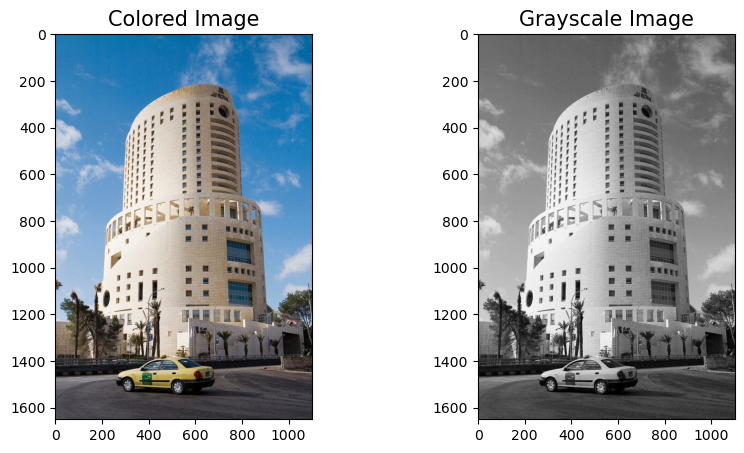

In [20]:
sample = imread(r"C:\Users\islam\Downloads\D1.png")
scaled_image = cv2.resize(sample, None, fx=1.5, fy=1.5)
sample_g = rgb2gray(scaled_image)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(scaled_image)
ax[1].imshow(sample_g,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Grayscale Image',fontsize=15)
plt.show()

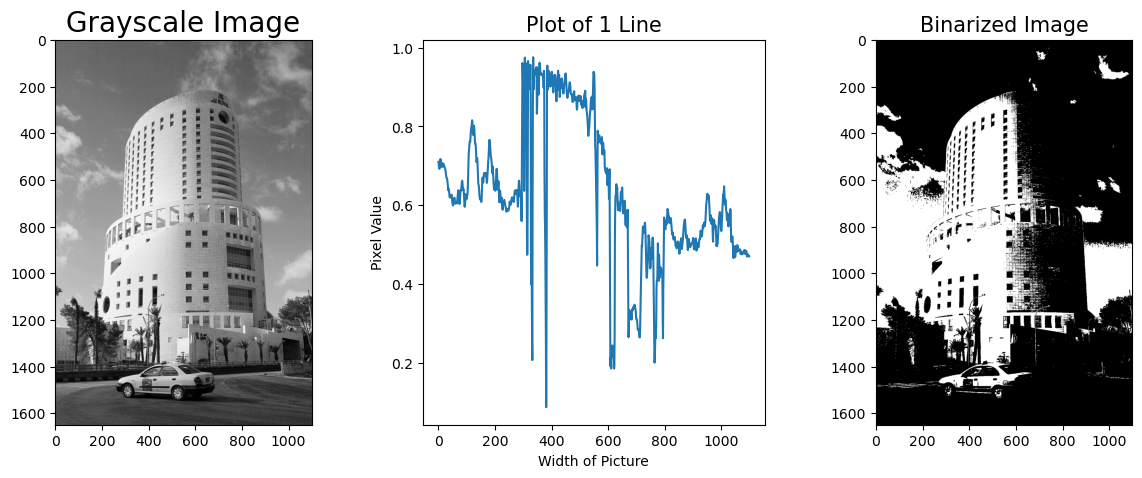

In [21]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sample_b = sample_g > 0.6
ax[0].set_title('Grayscale Image',fontsize=20)
ax[0].imshow(sample_g,cmap='gray')
ax[1].plot(sample_g[600])
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)
ax[2].set_title('Binarized Image',fontsize=15)
ax[2].imshow(sample_b,cmap='gray')

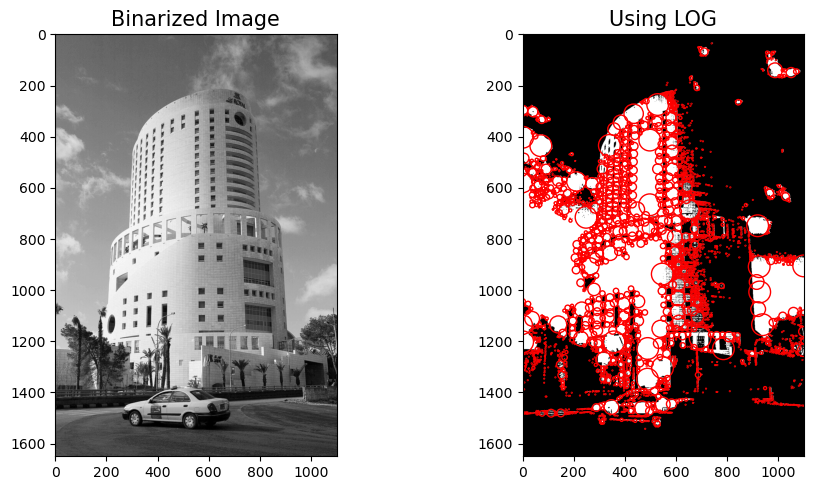

In [22]:
from skimage.feature import blob_dog, blob_log, blob_doh
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Binarized Image',fontsize=15)
ax[0].imshow(sample_g,cmap='gray')
blobs = blob_log(sample_b, max_sigma=30, threshold=0.01)
ax[1].imshow(sample_b, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax[1].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))
ax[1].set_title('Using LOG',fontsize=15)
plt.tight_layout()
plt.show()

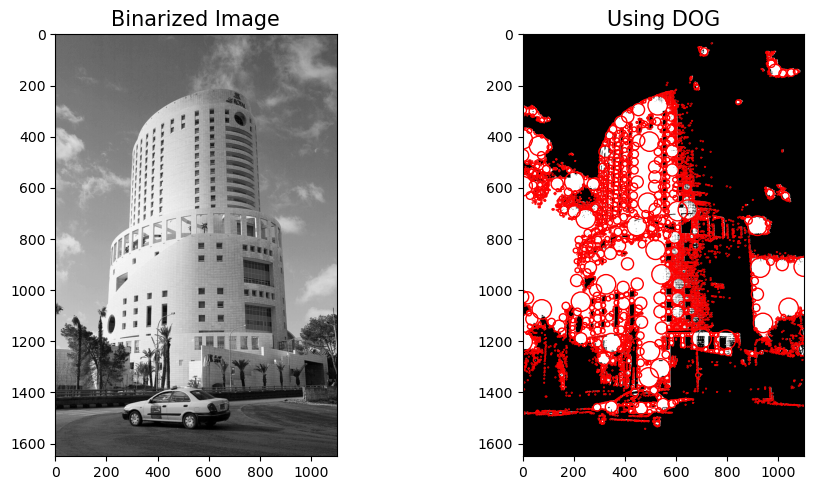

In [23]:
from skimage.feature import blob_dog, blob_log, blob_doh
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Binarized Image',fontsize=15)
ax[0].imshow(sample_g,cmap='gray')
blobs = blob_dog(sample_b, max_sigma=30, threshold=0.01)
ax[1].imshow(sample_b, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax[1].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))
ax[1].set_title('Using DOG',fontsize=15)
plt.tight_layout()
plt.show()